In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("water_potability.csv")

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.shape

(3276, 10)

DATA CLEANING


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.fillna(data.mean(),inplace=True)

In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#EDP

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


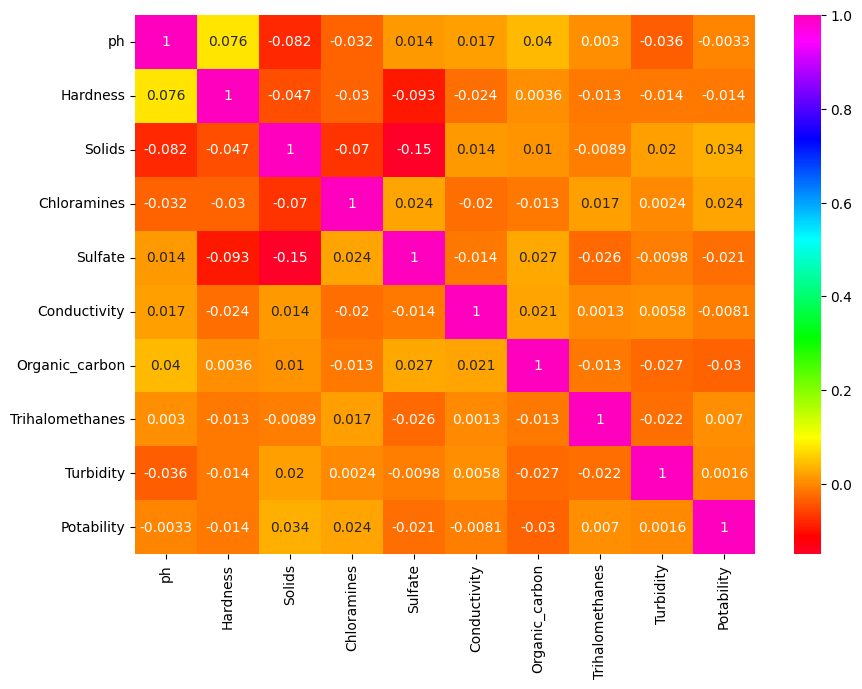

In [ ]:
# if reduce the dimensionality of a dataset is needed
# exploring the data
sns.heatmap(data.corr(),annot=True,cmap='gist_rainbow')
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

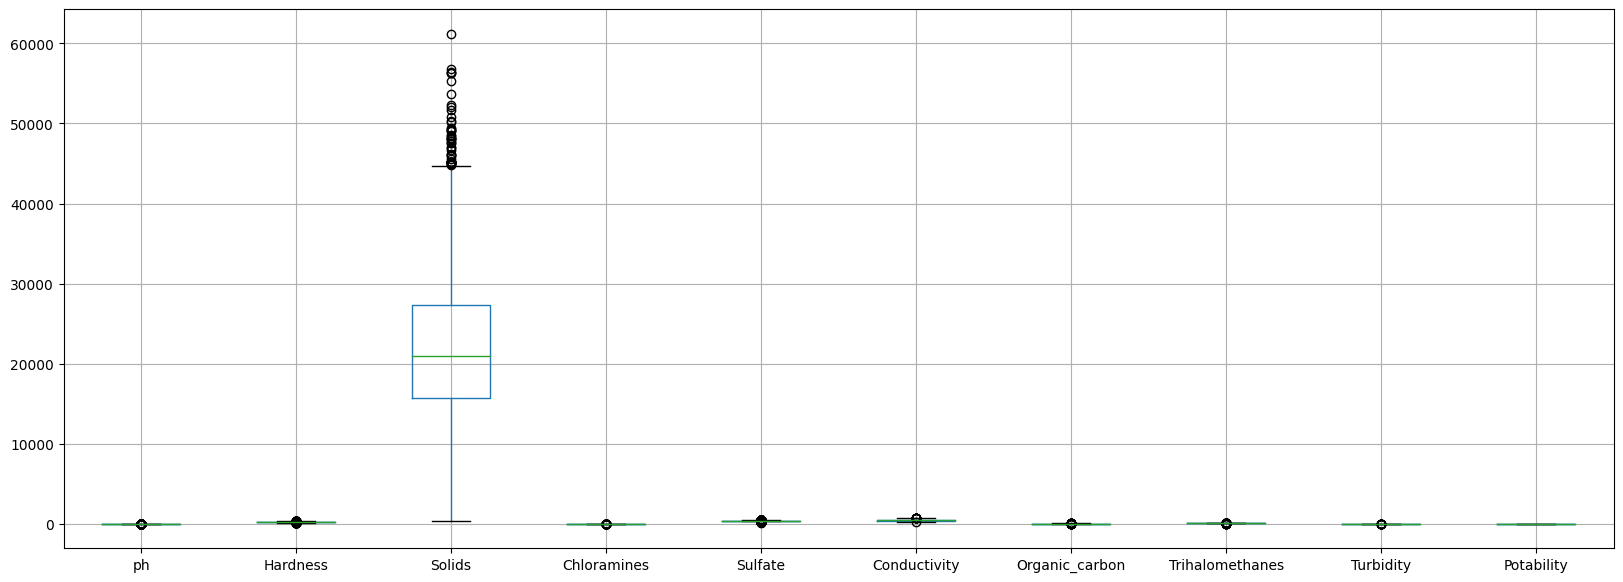

In [ ]:
#Outlier using Box plot
#outlier is an observation that lies abnormally far away from other values in a dataset
data.boxplot(figsize=(20,7))
plt.show()

In [ ]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

I considerd not to remove it because there are lots of outliers which can mean that excess solid shows bad quality


continuing with EDA

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [ ]:
# 1 means Potable and 0 means Not potable.

data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

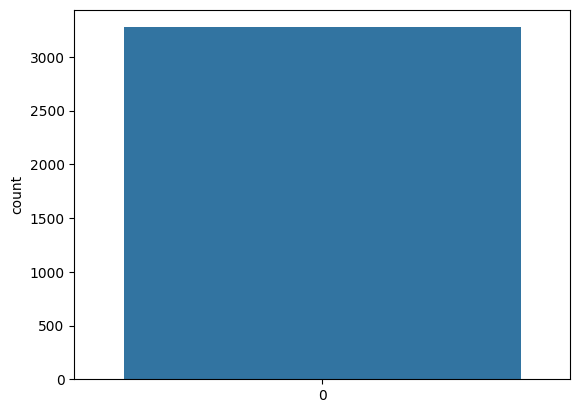

In [ ]:
#Checking the balance of the data
sns.countplot(data['Potability'])
plt.show()

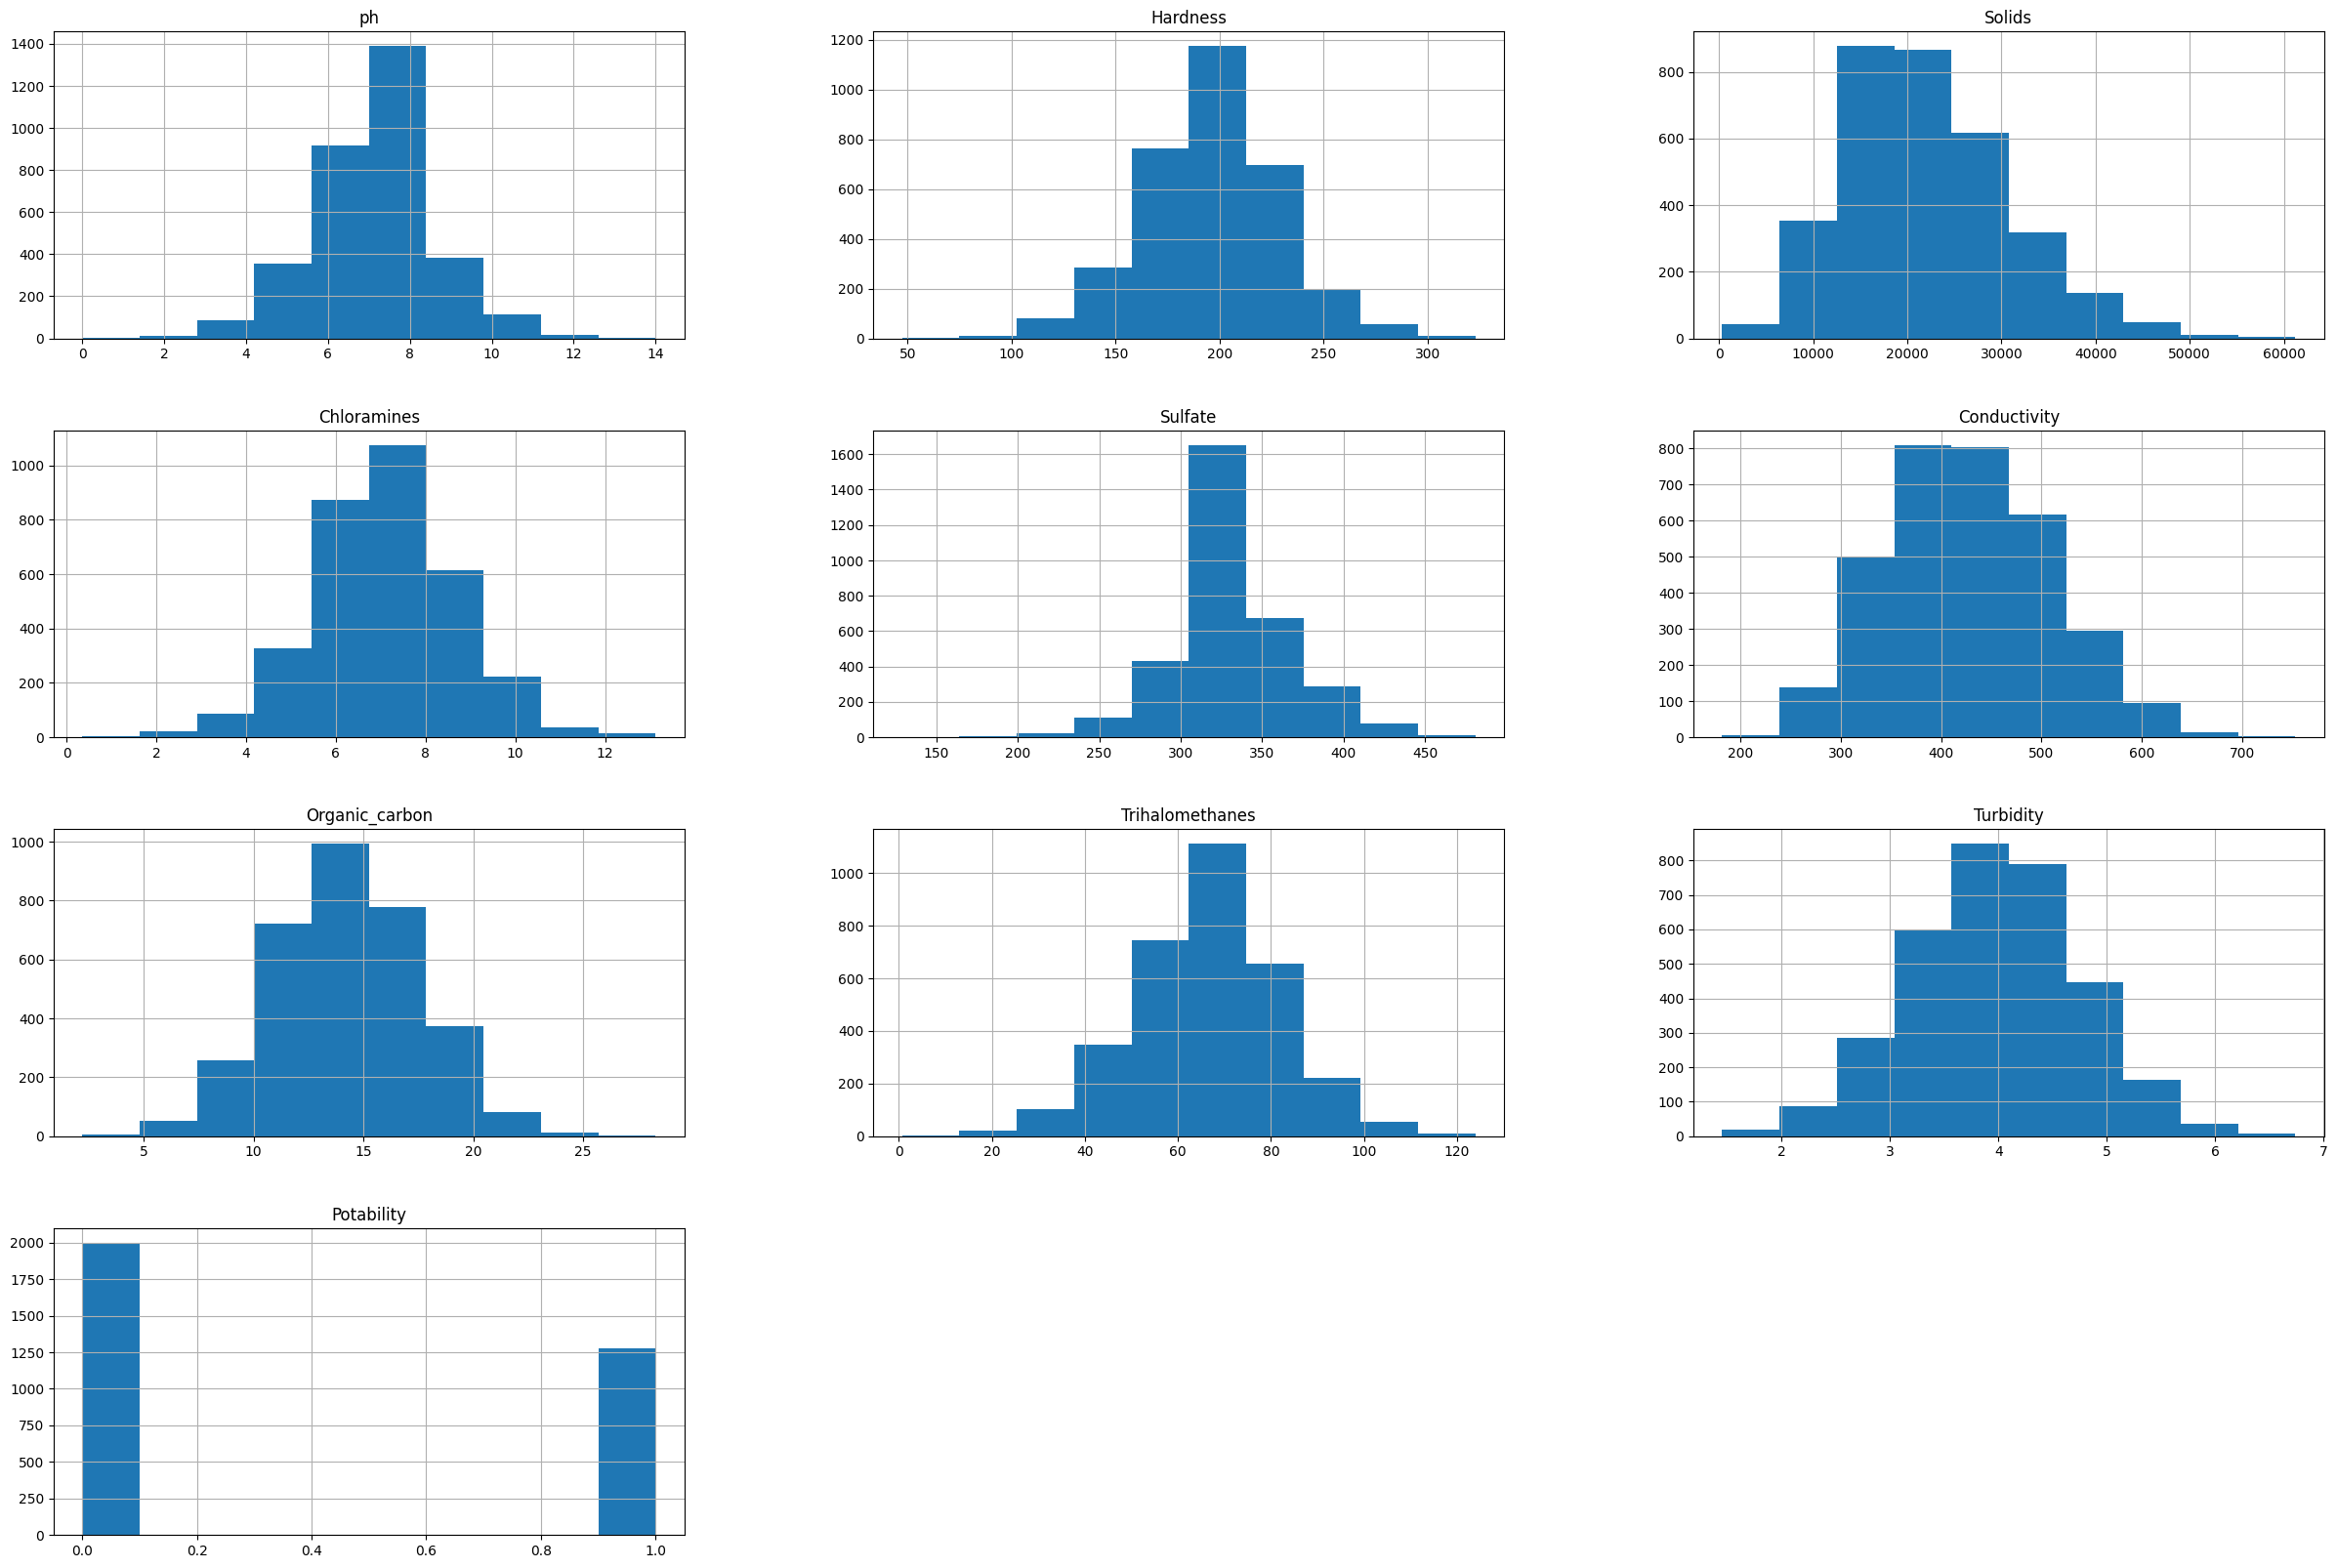

In [ ]:
data.hist(figsize=(30,20))
plt.show()

In [ ]:
# #Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):
# sns.pairplot(data,hue='Potability')
# plt.show()

This is normal distribution

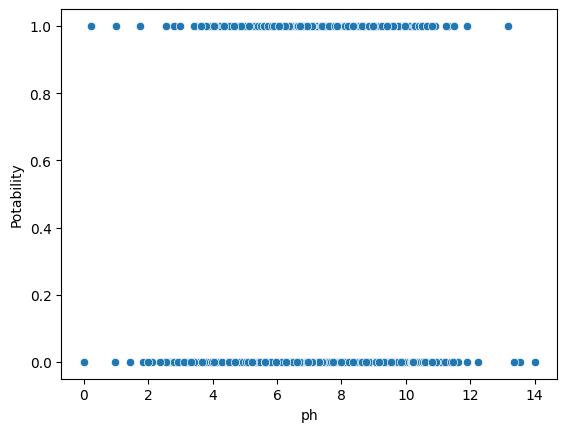

In [ ]:
sns.scatterplot(x=data['ph'], y=data['Potability'])
plt.show()

for more ph values, the water quality is good and once it goes over 12 its bad quality water

# partitioning


In [ ]:
x=data.drop('Potability',axis=1) #input data

In [ ]:
y=data['Potability'] #target variable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=404)

In [ ]:
y_train

536     0
2709    1
1367    0
995     0
3106    0
       ..
1935    1
1012    0
1206    1
1898    1
1788    0
Name: Potability, Length: 2620, dtype: int64

In [ ]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
536,9.606859,200.842143,18907.642841,7.515087,333.775777,370.903807,11.358735,64.371183,4.405352
2709,7.080795,189.823418,20278.338272,6.799940,333.775777,314.834175,10.092087,46.629299,4.940015
1367,6.906575,199.638124,15201.339954,5.136599,333.775777,306.023975,15.212798,90.579020,3.282750
995,8.312380,203.744548,8727.247349,7.456302,333.775777,543.392988,15.470400,81.508682,2.988093
3106,7.080795,156.773181,23084.066585,7.269795,334.956100,378.253869,19.247141,81.571554,5.564902
...,...,...,...,...,...,...,...,...,...
1935,7.080795,169.775475,37273.429223,8.027830,240.897629,454.543765,18.621698,63.519516,3.573741
1012,7.581688,180.749140,11989.246243,4.977307,328.176978,617.883513,13.561253,39.215917,4.457282
1206,7.080795,134.679257,30211.832991,4.792361,234.285621,391.820964,18.999154,66.396293,3.840889
1898,6.203573,139.129083,6698.239095,3.876813,333.775777,601.526167,13.368165,68.298689,4.305549


# Model trainning


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

AB = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 9, splitter='best')

In [ ]:
AB.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=9)

In [ ]:
y_test

65      0
190     0
841     0
1066    0
2831    1
       ..
1644    0
805     1
2848    1
875     0
2834    1
Name: Potability, Length: 656, dtype: int64

In [ ]:
y_prediction=AB.predict(x_test)

In [ ]:
accuracy_score(y_prediction,y_test) *100

62.04268292682927

In [ ]:
confusion_matrix(y_prediction,y_test)

array([[267, 134],
       [115, 140]])

In [ ]:
#The lenght
y_test.shape

(656,)

# model optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

AB = DecisionTreeClassifier()


criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split=range(1,10)


parameters = dict(criterion = criterion, splitter = splitter,min_samples_split = min_samples_split)
cv = RepeatedStratifiedKFold(n_splits = 5, random_state = 250)


grid_search_cv_AB = GridSearchCV(estimator=AB, param_grid=parameters, scoring='accuracy',  cv=cv)

In [ ]:
grid_search_cv_AB.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=250),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(grid_search_cv_AB.best_params_)

{'criterion': 'gini', 'min_samples_split': 9, 'splitter': 'random'}


In [ ]:
prediction_grid=grid_search_cv_AB.predict(x_test)

In [ ]:
accuracy_score(prediction_grid,y_test) *100

58.6890243902439

In [ ]:
confusion_matrix(y_test,prediction_grid)

array([[263, 119],
       [152, 122]])

# KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [ ]:
prediction_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score:',accuracy_score(y_test,prediction_knn)*100,'%')

accuracy_score score: 58.536585365853654 %


In [ ]:
confusion_matrix(prediction_grid,y_test)


array([[263, 152],
       [119, 122]])

# SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
X_train, X_test

(array([[ 1.70879729,  0.12665729, -0.34579714, ..., -0.90685518,
         -0.1330883 ,  0.5581509 ],
        [-0.01013309, -0.20438125, -0.19000353, ..., -1.29106024,
         -1.2465132 ,  1.23951938],
        [-0.12868557,  0.09048463, -0.76705654, ...,  0.26217528,
          1.51163319, -0.87248212],
        ...,
        [-0.01013309, -1.86109223,  0.93904019, ...,  1.41066844,
         -0.00599875, -0.16119518],
        [-0.60706283, -1.72740489, -1.7335213 , ..., -0.29734671,
          0.11338965,  0.43096351],
        [ 0.23194188, -0.8802032 ,  1.13497433, ...,  0.1443747 ,
          0.1732656 ,  0.67574804]]),
 array([[-0.55642137,  0.54437911, -0.05266636, ...,  0.27005198,
         -0.14199576,  1.64137567],
        [ 0.52590239, -0.59298255, -0.45442932, ..., -1.49532888,
          0.68145717,  0.27351638],
        [ 0.709939  ,  0.46519783, -1.56959188, ...,  1.40473541,
          2.66840857, -0.94231365],
        ...,
        [-0.40410429, -0.91442868, -1.16400707, ...,  

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[360  22]
 [202  72]]


0.6585365853658537

In [ ]:
print(x_test.iloc[0])
classifier.predict(X_test[0:1])

ph                     6.203978
Hardness             212.306618
Solids             21815.074148
Chloramines            7.873992
Sulfate              333.775777
Conductivity         362.108004
Organic_carbon        14.933013
Trihalomethanes       63.873820
Turbidity              5.215689
Name: 65, dtype: float64


array([0])

In [ ]:
X_test[0]

array([-0.55642137,  0.54437911, -0.05266636,  0.40023986,  0.02288586,
       -0.77652827,  0.27005198, -0.14199576,  1.64137567])